## Capstone Project : Horror Movie Image Classification

Image Classification with Convolutional Neural Networks<br>
https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8

Building powerful image classification models using very little data<br>
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

Simple Image Classification using Convolutional Neural Network — Deep Learning in python.<br>
https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

Dataset:<br>
Monsters: 412 images<br>
People: 378 images

Alternate Idea:<br>
Kaggle Horror Movie Dataset<br>
https://www.kaggle.com/PromptCloudHQ/imdb-horror-movie-dataset

In [1]:
from PIL import Image
import h5py

from PIL import Image, ImageFilter
try:
    original = Image.open('data/train/monsters/m1.jpg')
except:
    print("Unable to load image")

/Applications/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

/Applications/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


In [3]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in subfolders of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train/',  # this is the target directory
        target_size=(300, 300),  # all images will be resized to 300x300
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/test/',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')


Found 600 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [4]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [5]:
# TRAINING
model.fit_generator(
        train_generator,
        steps_per_epoch=600 // batch_size,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=150 // batch_size)

model.save_weights('30_epochs.h5')  # always save your weights after training or during training

Epoch 1/30
37/37 [==============================] - 141s 4s/step - loss: 0.7771 - acc: 0.5810 - val_loss: 0.7509 - val_acc: 0.5208
Epoch 2/30
37/37 [==============================] - 133s 4s/step - loss: 0.7343 - acc: 0.5675 - val_loss: 0.7081 - val_acc: 0.5299
Epoch 3/30
37/37 [==============================] - 138s 4s/step - loss: 0.6714 - acc: 0.6453 - val_loss: 0.7080 - val_acc: 0.5373
Epoch 4/30
37/37 [==============================] - 142s 4s/step - loss: 0.6599 - acc: 0.6588 - val_loss: 0.7761 - val_acc: 0.6269
Epoch 5/30
37/37 [==============================] - 165s 4s/step - loss: 0.6146 - acc: 0.6944 - val_loss: 0.7012 - val_acc: 0.5896
Epoch 6/30
37/37 [==============================] - 163s 4s/step - loss: 0.6422 - acc: 0.6723 - val_loss: 0.7664 - val_acc: 0.5970
Epoch 7/30
37/37 [==============================] - 149s 4s/step - loss: 0.6207 - acc: 0.7095 - val_loss: 0.6587 - val_acc: 0.6194
Epoch 8/30
37/37 [==============================] - 146s 4s/step - loss: 0.6125 - a

In [7]:
model.evaluate_generator(validation_generator)

[0.7686721237500509, 0.7000000007947286]

In [8]:
preds_test = model.predict_generator(validation_generator)

In [9]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [10]:
preds_test = [1 if x > .5 else 0 for x in preds_test]

In [11]:
print(classification_report(validation_generator.classes,preds_test))

             precision    recall  f1-score   support

          0       0.50      0.53      0.52        75
          1       0.50      0.47      0.48        75

avg / total       0.50      0.50      0.50       150



In [12]:
accuracy_score(validation_generator.classes,preds_test)

0.5

In [13]:
import matplotlib.pyplot as plt

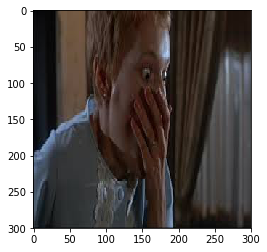

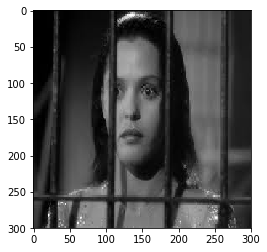

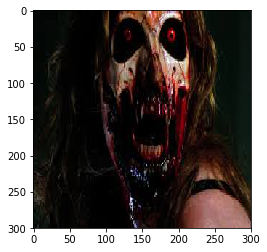

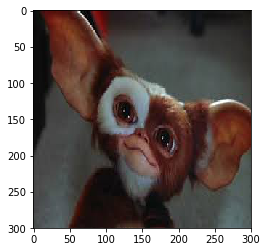

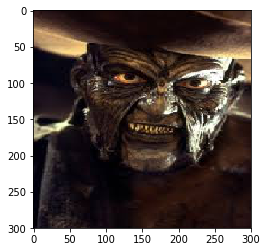

In [14]:
my_img = next(validation_generator)[0]
pred_dict = {}
for img in range(5):
    plt.figure()
    plt.imshow(my_img[img])
    preds = model.predict(my_img)
    pred_dict[img] = [0 if i <.5 else 1 for i in preds]
    print('\n')

In [15]:
pred_dict

{0: [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 1: [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 2: [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 3: [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 4: [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]}